Pytorch spatial tran

In [3]:
%matplotlib inline
import torch
import torch.nn as nn
from PIL import Image
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np

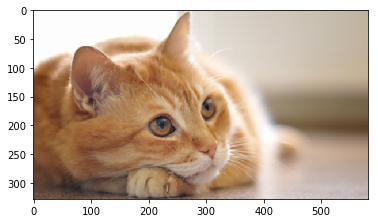

In [4]:
img = Image.open('cat.jpg').convert('RGB')
img = np.array(img)/255.0
plt.imshow(img)

In [63]:
var_image = torch.autograd.Variable(torch.from_numpy(img))

In [64]:
var_image_reshape = var_image.view(1, var_image.size(0),var_image.size(1),var_image.size(2))
var_image_reshape = var_image_reshape.transpose(2,3).transpose(1,2)

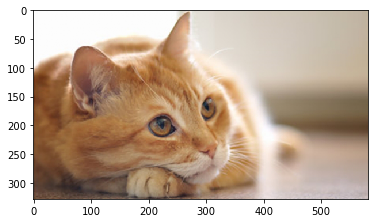

In [66]:
# notice that is has to be dtype=np.float32
indentity_theta = torch.autograd.Variable(torch.from_numpy(np.array([[1, 0, 0], [0, 1, 0]], dtype=np.float32)))
indentity_theta = indentity_theta.view(1,indentity_theta.size(0),indentity_theta.size(1))
grid = torch.nn.functional.affine_grid(indentity_theta, var_image_reshape.size())
out_image = torch.nn.functional.grid_sample(var_image_reshape,grid.double())
#Reshape channel for imshow
out_image_np = out_image.data.numpy()
out_image_np = np.squeeze(out_image_np)
out_image_np = out_image_np.transpose([1,2,0])
plt.imshow(out_image_np)

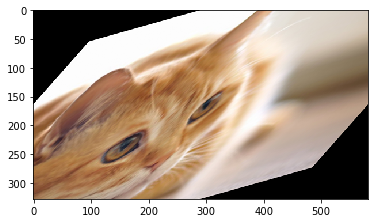

In [67]:
# notice that is has to be dtype=np.float32
indentity_theta = torch.autograd.Variable(torch.from_numpy(np.array([[1, 0.5, 0], [0.5, 1, 0]], dtype=np.float32)))
indentity_theta = indentity_theta.view(1,indentity_theta.size(0),indentity_theta.size(1))
grid = torch.nn.functional.affine_grid(indentity_theta, var_image_reshape.size())
out_image = torch.nn.functional.grid_sample(var_image_reshape,grid.double())
#Reshape channel for imshow
out_image_np = out_image.data.numpy()
out_image_np = np.squeeze(out_image_np)
out_image_np = out_image_np.transpose([1,2,0])
plt.imshow(out_image_np)